# Supervised Learning Project
## Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
### Domain: Banking
## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better
target marketing to increase the success ratio with minimal budget.
### Attribute Information:
  1. ID : Customer ID
  2. Age : Customer's age in completed years
  3. Experience : #years of professional experience
  4. Income : Annual income of the customer (1000 Dollars)
  5. ZIP Code : Home Address ZIP code
  6. Family : Family size of the customer
  7. CCAvg : Avg. spending on credit cards per month (1000 Dollars)
  8. Education : Education Level
      1. Undergrad (1)
      2. Graduate (2)
      3. Advanced/Professional (3)
  9. Mortgage : Value of house mortgage if any. (1000 Dollars)
  10. Personal Loan : Did this customer accept the personal loan offered in the last campaign?
  11. Securities Account : Does the customer have a securities account with the bank?
  12. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
  13. Online : Does the customer use internet banking facilities?
  14. Credit card : Does the customer use a credit card issued by UniversalBank?

### Learning Outcomes:
 - Exploratory Data Analysis
 - Preparing the data to train a model
 - Training and making predictions using a classification model
 - Model evaluation

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.
Steps and tasks:
1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings (15 marks)
3. Get the target column distribution. Your comments (5 marks)
4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)
6. Print the confusion matrix for all the above models (5 marks)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

### Import the libraries

In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True) # adds a nice background to the graphs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics


## 1. Read the dataset

In [271]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Check for missing values


In [272]:
# Check for missing values
print(df.isnull().sum())
# There are no missing values
print("Shape of the dataset is ", df.shape)
df.describe()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
Shape of the dataset is  (5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 2. Study the data distribution in each attribute, share your findings (15 marks)


#### 1. ID : Customer ID
Customer ID seems to be a flat distribution because each customer has a unique ID. This variable may not impact the results and can be ignored.

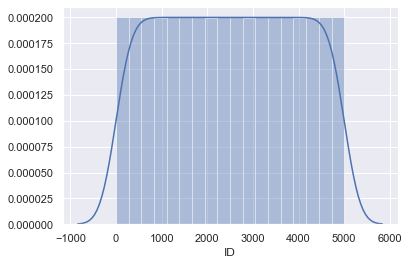

In [273]:
sns.distplot(df['ID'])

In [274]:
# Dropping the ID attribute as it is not relevant to the model
df = df.drop('ID', axis=1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### 2. Age : Customer's age in completed years
The Age distribution seems to be a multi-modal distribution with peaks at 34-36, 44-46 and 55-56 years of age.

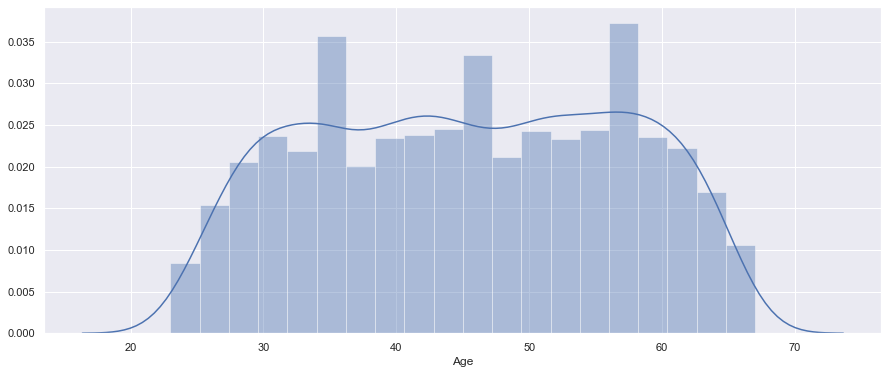

In [275]:
plt.figure(figsize=(15,6))
sns.distplot(df['Age'],bins=20);

#### 3. Experience : #years of professional experience
The distribution for the number of years of professional experience also seems to be multi-modal normal distribution. 
- There are some negative values that need to be treated. 
- Also, the Experience is highly correlated with the Age of the person. 

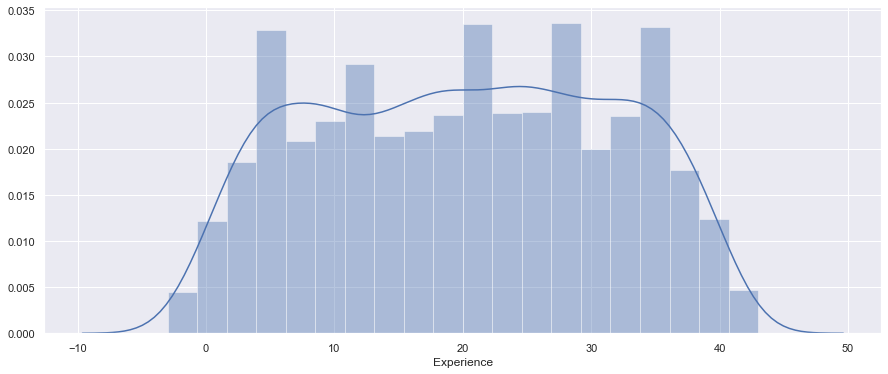

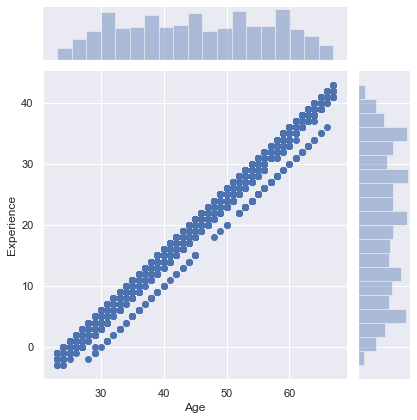

In [276]:
plt.figure(figsize=(15,6))
sns.distplot(df['Experience'],bins=20);
sns.jointplot(df['Age'], df['Experience'])

#### 4. Income : Annual income of the customer ($000)
The Income attribute looks like a heavily right skewed distribution. 
And there are lots of outliers towards the right side

Income Skewness =  0.8413386072610816


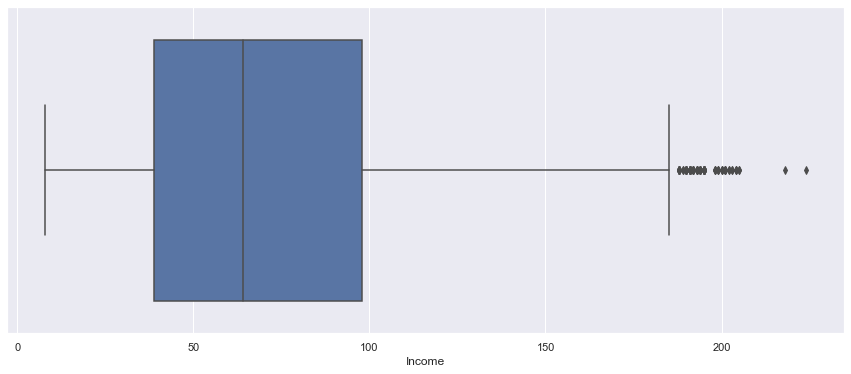

In [277]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Income']);
print('Income Skewness = ', df.Income.skew())

#### 5.       ZIP Code : Home Address ZIP code
The boxplot indicates there is 1 outlier which is a 4 digit Zip code and doesn't seem to be a valid entry

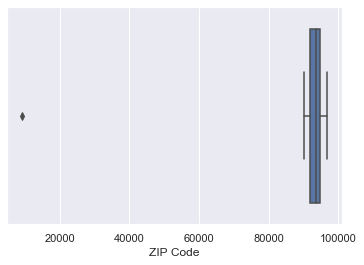

In [278]:
sns.boxplot(df['ZIP Code']);

In [279]:
# Find the invalid ZIP Code value
df_zip = df['ZIP Code'].unique()
df_zip.sort()
print("Invalid ZIP Code value: ", df_zip[0])
df_zip[:5]

Invalid ZIP Code value:  9307


array([ 9307, 90005, 90007, 90009, 90011], dtype=int64)

In [280]:
# We can impute the Invalid Zip Code value with the Mode of the distribution
Zip_mode = df['ZIP Code'].mode()
# print(Zip_mode)
df['ZIP Code'].replace(to_replace=9307, value = Zip_mode[0], inplace = True)
df['ZIP Code'].nunique()

466

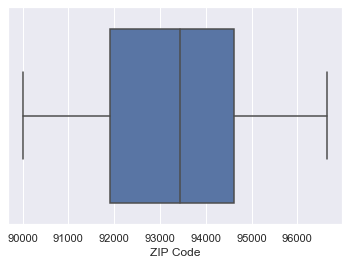

In [281]:
# Now all Zip codes are 5 digit codes.
sns.boxplot(df['ZIP Code']);

#### 6. Family : Family size of the customer
Most number of people have a family size of 1 or 2 and the least is 3.

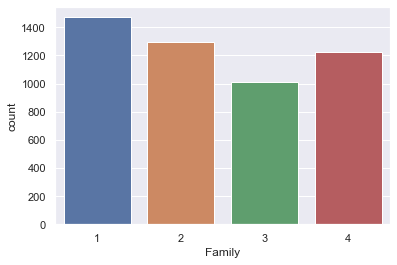

In [282]:
sns.countplot(df['Family']);

#### 7. CCAvg : Avg. spending on credit cards per month ($000)
The CC Average spending distribution is right skewed. i.e. there are lot of people with low spending whereas wery less people with higher spendings. 
Also, there are lot of outliers towards the right

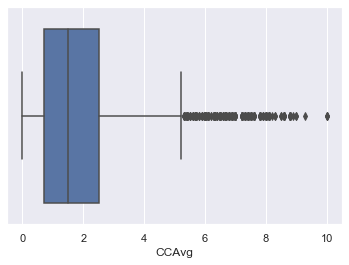

In [283]:
sns.boxplot(df['CCAvg']);

#### 8.      Education : Education Level (1. Undergrad, 2. Graduate, 3. Advanced/Professional)
Highest number of people are at Undergrade level. 

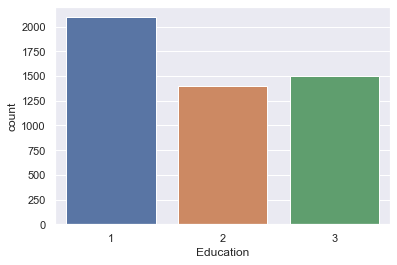

In [284]:
sns.countplot(df['Education']);

#### 9 Mortgage : Value of house mortgage if any. ($000)
- The Mortgage data is heavily skewed
- Most people don't have house mortgage (Data points close to zero)
- There are lots of outliers on the right

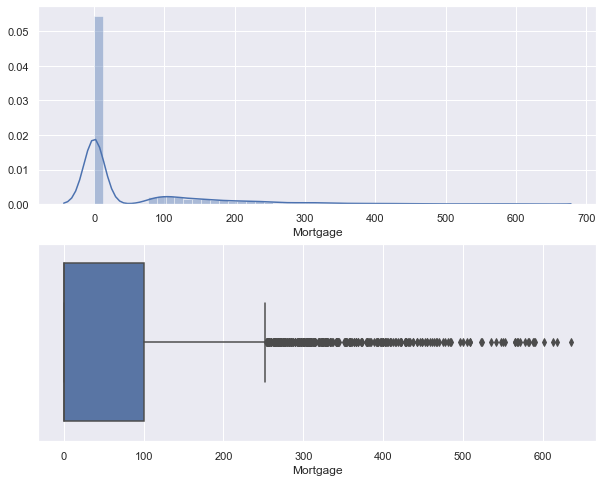

In [285]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(2,1, figsize=(10,8))
ax[0] = plt.subplot(2,1,1)
ax[1] = plt.subplot(2,1,2)
sns.distplot(df['Mortgage'],ax=ax[0]);
sns.boxplot(df['Mortgage'],ax=ax[1]);

#### 10. Securities Account : Does the customer have a securities account with the bank?
- This is Categorical data with classess 0 and 1
- Around 90% of the people don't have a Securities account with the bank

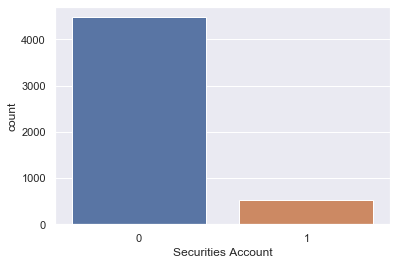

In [286]:
sns.countplot(df['Securities Account']);

#### 11. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
- This is Categorical data with classess 0 and 1
- Very less number of people have a CD account with the bank

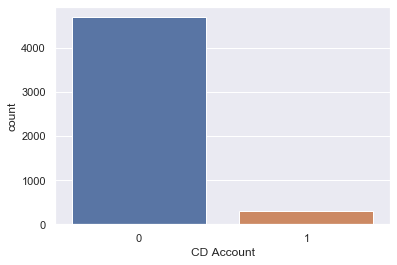

In [287]:
sns.countplot(df['CD Account']);

#### 12. Online : Does the customer use internet banking facilities?
- This is Categorical data with classess 0 and 1
- Around 60% of people are using the Online banking facility

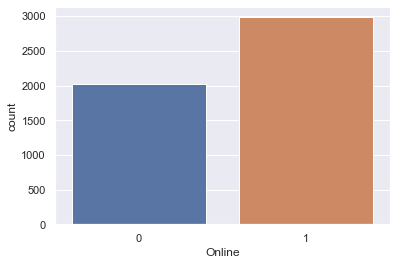

In [288]:
sns.countplot(df['Online']);

#### 13. Credit card : Does the customer use a credit card issued by UniversalBank?
- This is Categorical data with classess 0 and 1
- Around 30% people use Credit card issued by the bank.

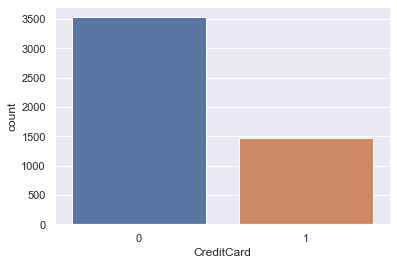

In [289]:
sns.countplot(df['CreditCard']);

### Correlation Analysis:
- Age and Experience seem to be highly correlated.
- To avoid the <b>Multicolliniearity problem</b> the Experience column needs to be dropped. 
- Income and CCAvg spending attributes are also correlated (0.65). But we will retain those because the target attribute (Personal Loan) is very much dependent on these attributes. 
- Also, dropping the ZIP Code column as it is a categorical variable and not significant to the model.


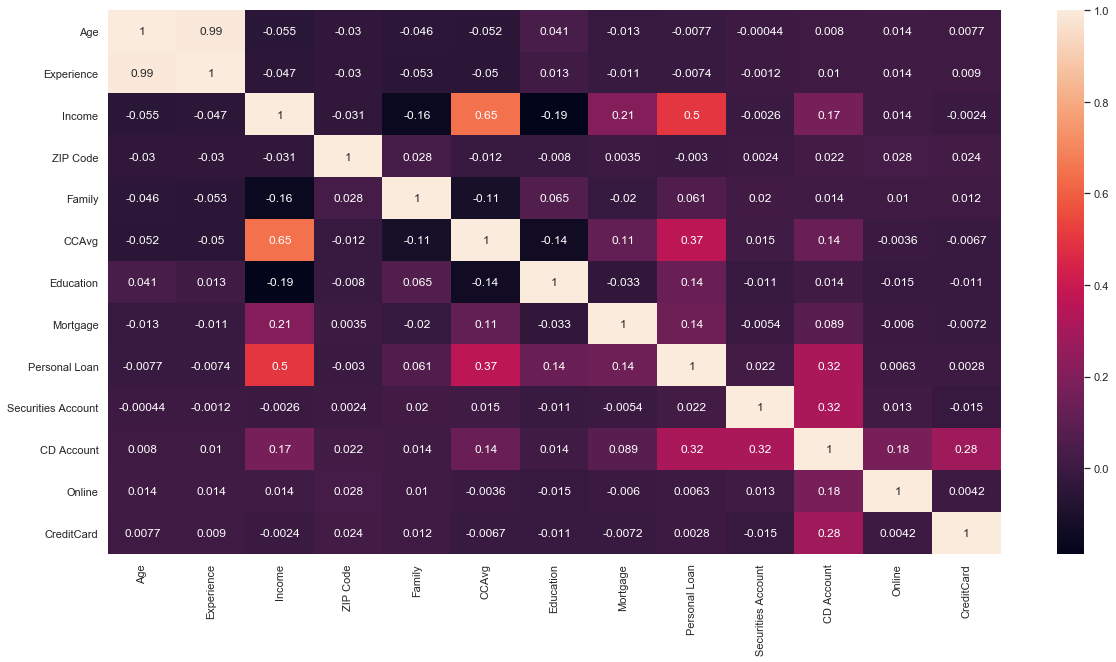

In [290]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True);
# Dropping Experience column
df.drop(columns = 'Experience', inplace=True)
df.drop(columns = 'ZIP Code', inplace=True)

In [291]:
# Here is the final dataset
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


## 3. Get the target column distribution. Your comments (5 marks)
The target column is Personal Loan (Did this customer accept the personal loan offered in the last campaign?)
The distribution shows less than 10% customers accepted the personal loan offered. 
- This shows the target variable is imbalanced. 
- Customers who have not accepted the Personal Loan offer are majority class (Class 0). 
- Customers who have accepted the Personal Loan offer are minority class (Class 1). 

In [292]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

% of customers who accepted the personal loan offer= 9.6


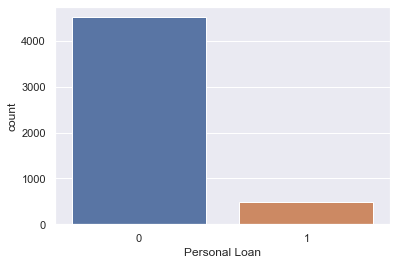

In [293]:
sns.countplot(df['Personal Loan']);
print('% of customers who accepted the personal loan offer=', len(df[df['Personal Loan']==1])*100/len(df['Personal Loan']))

In [294]:
# The attributes vary quite a bit for the 2 classess
df.groupby('Personal Loan').mean()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.367257,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [295]:
# We will split the data into X and y. (y is the target variable.)
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']
X.head()
#y.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


## 4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)


In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
cols = X_train.columns
X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2573,58,80,2,1.6,1,0,0,0,1,1
2066,41,30,2,1.4,2,0,0,0,0,1
2823,33,21,1,0.6,3,0,1,0,0,0
2389,27,41,1,1.9,3,0,0,0,0,1
2702,42,144,2,6.1,1,158,0,0,0,0


In [297]:
y_train.describe()

count    3500.000000
mean        0.097143
std         0.296195
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

#### Checking the class distribution in Training and Testing Datasets

In [298]:
print('Train data')
print('% of customers who accepted the personal loan offer=', y_train[y_train==1].count()*100/y_train.count())
print('% of customers who didnot accept the personal loan offer=', y_train[y_train==0].count()*100/y_train.count())
print('Test data') 
print('% of customers who accepted the personal loan offer=', y_test[y_test==1].count()*100/y_test.count())
print('% of customers who didnot accept the personal loan offer=', y_test[y_test==0].count()*100/y_test.count())

Train data
% of customers who accepted the personal loan offer= 9.714285714285714
% of customers who didnot accept the personal loan offer= 90.28571428571429
Test data
% of customers who accepted the personal loan offer= 9.333333333333334
% of customers who didnot accept the personal loan offer= 90.66666666666667


The above statistics show the % of customers who accepted the personal loan offer is consistent between Train and Test data.

### Data Preprocessing: Normalization
- Because the Scale of various attributes varries significantly from one another, we will scale the data to a common scale. 
- We will use MinMaxScaler for transforming the data between the range 0 to 1, because there are 4 category variables carrying binary values 0 and 1. 
- MinMaxScaler will not impact the categorical variables after scaling.

In [299]:
scalar = MinMaxScaler()

X_train = pd.DataFrame(scalar.fit_transform(X_train))
X_train.columns = cols

X_test = pd.DataFrame(scalar.fit_transform(X_test))
X_test.columns = cols

X_train.describe()
#X_test.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,0.507201,0.301265,0.465048,0.193978,0.445000,0.091471,0.104857,0.059143,0.588857,0.298286
std,0.260308,0.211429,0.381219,0.174411,0.421846,0.162459,0.306413,0.235926,0.492111,0.457571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.138889,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.254630,0.333333,0.150000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.727273,0.406250,0.666667,0.260000,1.000000,0.162205,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [300]:
X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.795455,0.333333,0.333333,0.16,0.0,0.000000,0.0,0.0,1.0,1.0
1,0.409091,0.101852,0.333333,0.14,0.5,0.000000,0.0,0.0,0.0,1.0
2,0.227273,0.060185,0.000000,0.06,1.0,0.000000,1.0,0.0,0.0,0.0
3,0.090909,0.152778,0.000000,0.19,1.0,0.000000,0.0,0.0,0.0,1.0
4,0.431818,0.629630,0.333333,0.61,0.0,0.248819,0.0,0.0,0.0,0.0


## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)
## 6. Print the confusion matrix for all the above models (5 marks)
- Both questions Done together

### (i) Logistic Regression

In [301]:
from sklearn.linear_model import LogisticRegression

In [302]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

train_score = logit.score(X_train, y_train)
print("Training Score", train_score*100,'%')

Training Score 95.08571428571429 %


In [303]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
cm_logit = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Logistic Regression Confusion Matrix\n", cm_logit)
print("Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):\n", accuracy_score(y_test, y_pred)*100,'%')

Logistic Regression Confusion Matrix
 [[  90   50]
 [  19 1341]]
Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):
 95.39999999999999 %


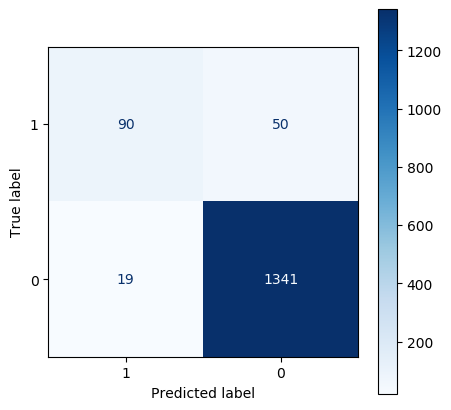

In [304]:
# Plotting the confusion Matrix
sns.reset_defaults()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_confusion_matrix(logit, X_test, y_test, labels=[1,0], display_labels=[1,0],cmap=plt.cm.Blues, ax=ax, values_format='.4g');

In [305]:
# Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.83      0.64      0.72       140
           0       0.96      0.99      0.97      1360

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



### Results: Logistic Regression

- Precision - 83%
- Recall - 64%
- F1-score - 0.72

### (ii) K-NN Classification

In [306]:
from sklearn.neighbors import KNeighborsClassifier


In [307]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print("KNN Training score:", KNN.score(X_train, y_train)*100,'%')
y_pred_KNN = KNN.predict(X_test)

KNN Training score: 96.74285714285715 %


In [308]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN, labels=[1,0])
print("KNN Confusion Matrix \n", cm_KNN)
print("Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):\n", accuracy_score(y_test, y_pred_KNN)*100,'%')

KNN Confusion Matrix 
 [[ 100   40]
 [   9 1351]]
Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):
 96.73333333333333 %


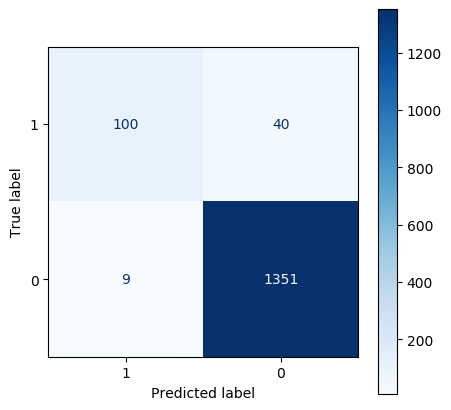

In [309]:
# Plotting the confusion Matrix
sns.reset_defaults()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_confusion_matrix(KNN, X_test, y_test, labels=[1,0], display_labels=[1,0],cmap=plt.cm.Blues, ax=ax, values_format='.4g');

In [310]:
# Classification Report 
print("KNN Classification Report \n", classification_report(y_test, y_pred_KNN, labels=[1,0]))

KNN Classification Report 
               precision    recall  f1-score   support

           1       0.92      0.71      0.80       140
           0       0.97      0.99      0.98      1360

    accuracy                           0.97      1500
   macro avg       0.94      0.85      0.89      1500
weighted avg       0.97      0.97      0.97      1500



### Results: K-Nearest Neighbor

- Precision - 92%
- Recall - 71%
- F1-score - 0.80

### (iii) Naive Bayes 

In [311]:
from sklearn.naive_bayes import GaussianNB

In [312]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)
print("NaiveBayes Training score:", nbc.score(X_train, y_train)*100,'%')
y_pred_NaiveBayes = nbc.predict(X_test)

NaiveBayes Training score: 88.34285714285714 %


In [313]:
cm_NB = confusion_matrix(y_test, y_pred_NaiveBayes, labels=[1,0])
print("NaiveBayes Confusion Matrix \n", cm_NB)
print("Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):\n", accuracy_score(y_test, y_pred_NaiveBayes)*100,'%')

NaiveBayes Confusion Matrix 
 [[  91   49]
 [ 130 1230]]
Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):
 88.06666666666668 %


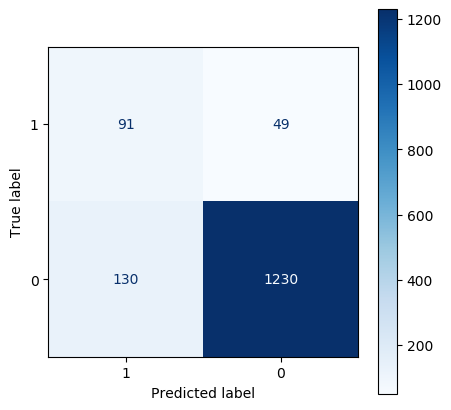

In [314]:
# Plotting the confusion Matrix
sns.reset_defaults()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_confusion_matrix(nbc, X_test, y_test, labels=[1,0], display_labels=[1,0],cmap=plt.cm.Blues, ax=ax, values_format='.4g');

In [315]:
# Classification Report
print("NaiveBayes Classification Report \n", classification_report(y_test, y_pred_NaiveBayes, labels=[1,0]))

NaiveBayes Classification Report 
               precision    recall  f1-score   support

           1       0.41      0.65      0.50       140
           0       0.96      0.90      0.93      1360

    accuracy                           0.88      1500
   macro avg       0.69      0.78      0.72      1500
weighted avg       0.91      0.88      0.89      1500



### Results: Naive Bayes

- Precision - 41%
- Recall - 65%
- F1-score - 0.50

## 7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

- Class 1 is the target class i.e. Customer accepting the Personal Loan Offer. 
- KNN is the best model in this case with highest Precision and Recall for Class 1

##### KNN                                      
 - Precision     Recall        f1-score     Accuracy
 - 92 %          71 %           0.80         96.733 %

##### Logistic Regression          
 - Precision     Recall        f1-score     Accuracy
 - 83 %          64 %           0.72         95.399 %

##### Naive Bayes
 - Precision     Recall        f1-score     Accuracy
 - 41 %          65 %           0.50         88.066 %

In [316]:
# Model / Metrics     Precision     Recall        f1-score     Accuracy
# KNN                 92 %          71 %           0.80         96.733 %
# Logistic Regression 83 %          64 %           0.72         95.399 %
# Naive Bayes         41 %          65 %           0.50         88.066 %

### (i) Hyperparameters Tuning for Logistic Regression

In [317]:
from sklearn.model_selection import GridSearchCV

In [318]:
param_grid_logit = [
    { 'C': [0.01, 0.05, 1, 2, 3, 4, 5],
      'penalty': ['l1', 'l2'],
       'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
]
# max_iter=100

Performing a grid search for the logit function with 5 Cross Validations using Macro Avg F1-score as the scoring criteria. Here F1-macro is choosen as the scoring criteria, because the Gridsearch by default does the scoring for majority class which is class 0 whereas we are more interested in the Minority class 1. So, macro avg will have the Avg of the F1 scores for Majority and Minority Classes.

In [319]:
import warnings
warnings.filterwarnings("ignore")
grid_logit = GridSearchCV(logit, param_grid_logit, cv=5, refit=True, return_train_score=True, scoring='f1_macro')
grid_logit.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.05, 1, 2, 3, 4, 5],
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_macro', verbos

In [320]:
print('Best Macro Avg F1-Score from Training data using Grid Search:', grid_logit.best_score_)
print('Best Macro Avg F1-Score from Testing data using Grid Search:', grid_logit.score(X_test, y_test))

Best Macro Avg F1-Score from Training data using Grid Search: 0.8382998612193393
Best Macro Avg F1-Score from Testing data using Grid Search: 0.8462554664723032


In [321]:
print('Best Hyperparameters for Logistic Regression', grid_logit.best_params_)

Best Hyperparameters for Logistic Regression {'C': 5, 'penalty': 'l2', 'solver': 'newton-cg'}


#### Refit Logistic Regression model
Let's fit the LR model again with the best parameters discovered through Grid Search

In [322]:
# Redefining Logit function with the best parameters discovered through Grid Search
logit = LogisticRegression(penalty='l2', C=5, solver='newton-cg')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

train_score = logit.score(X_train, y_train)
print("Training Score", train_score*100,'%')

cm_logit = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Logistic Regression Confusion Matrix\n", cm_logit)
print("Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):\n", accuracy_score(y_test, y_pred)*100,'%')

Training Score 95.08571428571429 %
Logistic Regression Confusion Matrix
 [[  92   48]
 [  24 1336]]
Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):
 95.19999999999999 %


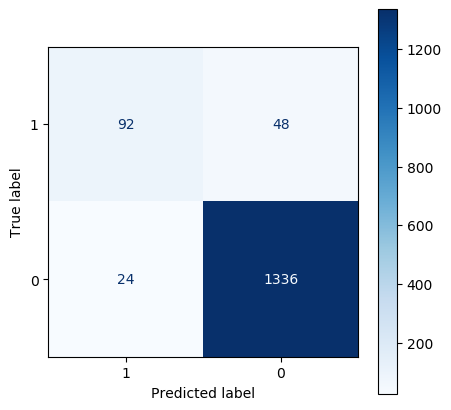

In [323]:
# Plotting the confusion Matrix
sns.reset_defaults()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_confusion_matrix(logit, X_test, y_test, labels=[1,0], display_labels=[1,0],cmap=plt.cm.Blues, ax=ax, values_format='.4g');

In [324]:
# Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.79      0.66      0.72       140
           0       0.97      0.98      0.97      1360

    accuracy                           0.95      1500
   macro avg       0.88      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



### Results: Post hyperparameter tuning (Logistic Regression)
- Precision has reduced from 83% to 79%
- Recall has increased from 64% to 66%
- F1-score remains the same at 0.72
- Test Accuracy has reduced from 95.399% to 95.199%

### (ii) Tuning the value of k for KNN

In [325]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score

In [326]:
k_range = range(1,20)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring="f1")
    k_score.append(scores.mean())
best_k = np.argmax(k_score) + 1
print('Best k=', best_k)
print(k_score)

Best k= 1
[0.7776655063183217, 0.6587028909357292, 0.741021528202783, 0.6578515135095518, 0.7039917761747978, 0.62907301872531, 0.6637641146987489, 0.5917785620176925, 0.6144206377653895, 0.5781146478964491, 0.5994695383334834, 0.5528272856193432, 0.5789211261551687, 0.5605996328336753, 0.5818674412235929, 0.53620402599601, 0.5560089032524529, 0.5453743586054906, 0.561349250588381]


#### Choosing k=1 may cause high variance. Hence selecting the next best k value which is k=3.

In [327]:

knn1 = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
knn1.fit(X_train, y_train)
print("KNN Training score:", knn1.score(X_train, y_train)*100,'%')
y_pred_knn = knn1.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=[1,0])
print("KNN Confusion Matrix \n", cm_knn)
print("Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):\n", accuracy_score(y_test, y_pred_knn)*100,'%')

KNN Training score: 97.6 %
KNN Confusion Matrix 
 [[ 106   34]
 [   9 1351]]
Testing dataset Accuracy(Model predicting likelihood of a cusotmer buying personal loan):
 97.13333333333334 %


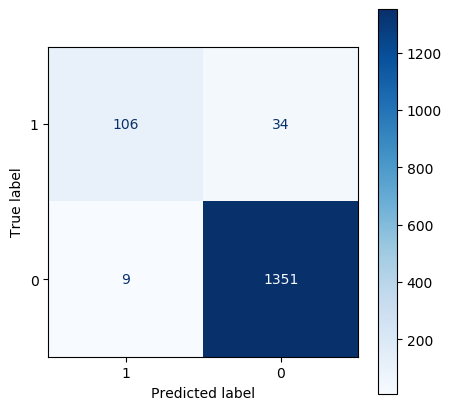

In [328]:
# Plotting the confusion Matrix
sns.reset_defaults()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_confusion_matrix(knn1, X_test, y_test, labels=[1,0], display_labels=[1,0],cmap=plt.cm.Blues, ax=ax, values_format='.4g');


In [329]:
# Classification Report 
print("KNN Classification Report \n", classification_report(y_test, y_pred_knn, labels=[1,0]))

KNN Classification Report 
               precision    recall  f1-score   support

           1       0.92      0.76      0.83       140
           0       0.98      0.99      0.98      1360

    accuracy                           0.97      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.97      0.97      0.97      1500



### Results: Post hyperparameter tuning (K-Nearest Neighbor)
- Precision has remained same at 92%
- Recall has increased from 71% to 76%
- F1-score has increased from 0.80 to 0.83
- Test Accuracy has increased from 96.733% to 97.133%

# Conclusion: 

- KNN performs the best because it is a non parametric model and doesn't get affected by interdependency of the features or Multicollinearity.
- Also, KNN doesn't get impacted by the presence of outliers whereas the other models get impacted heavily by outliers.
- From the scores, we have seen KNN gives the best predictions for class 1 of the target attribute
- KNN predictions can be further improved by using the optimal value of k=3 instead of default k=5. After Grid search, the Precision, recall and f1-score has improved compared to default preditions which used k=5

In [330]:
##################### BEST SCORES #######################
# Model / Metrics     Precision     Recall        f1-score     Train dataset Accuracy      Test dataset Accuracy
# KNN                 92 %          76 %           0.83         97.600 %                     97.133 %
# Logistic Regression 83 %          64 %           0.72         95.085 %                     95.399 %
# Naive Bayes         41 %          65 %           0.50         88.342 %                     88.066 %
#########################################################